<a href="https://www.kaggle.com/code/rajatraj0502/global-superstore-dataset?scriptVersionId=177672083" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/global-superstore-dataset/Global_Superstore.csv


In [2]:
import pandas as pd

# Load the CSV file into a DataFrame
data_path = os.path.join('/kaggle/input/global-superstore-dataset/Global_Superstore.csv')
global_superstore_data = pd.read_csv(data_path)

# Display the first few rows of the dataframe and the data types of each column
global_superstore_data.head(), global_superstore_data.dtypes


(   Global_Orders_ID        Order_ID         Category           City  \
 0                 1  CA-2013-158568       Technology        Chicago   
 1                 2  CA-2013-158568  Office Supplies        Chicago   
 2                 3  CA-2013-161207  Office Supplies        Concord   
 3                 4  CA-2013-128727       Technology  New York City   
 4                 5  CA-2013-159912        Furniture   Philadelphia   
 
          Country    Customer_Name Market Customer_ID  Order_Date   Ship_Date  \
 0  United States     Rick Bensley   USCA   RB-194654  2020-08-28  2020-09-01   
 1  United States     Rick Bensley   USCA   RB-194654  2020-08-28  2020-09-01   
 2  United States  Adam Bellavance   USCA   AB-100604  2020-08-28  2020-09-02   
 3  United States     Meg O'Connel   USCA   MO-178004  2020-08-28  2020-09-03   
 4  United States      George Bell   USCA   GB-145304  2020-08-28  2020-09-02   
 
    ...   Region      Segment       Ship_Mode          State Sub_Category  \
 

**Data Types**

**Categorical:** Order_ID, Category, City, Country, Customer_Name, etc.

**Numerical:** Discount, Profit, Quantity, Sales, etc.

**Date:** Order_Date, Ship_Date

**Analysis by focusing on several key areas:**

* Sales and Profit by Product Category
* Customer Segmentation Analysis
* Impact of Discounts on Sales and Profits
* Geographical Sales Performance

We'll create visualizations for each of these points, which will provide comprehensive insights into the dataset.

1. Sales and Profit by Product Category
We'll start by plotting the total sales and profits for each product category to see which categories are the most and least profitable.

2. Customer Segmentation Analysis
We'll visualize the distribution of customers across different segments. This will help in understanding the customer base better and tailoring marketing strategies accordingly.

3. Impact of Discounts on Sales and Profits
We will examine how discounts affect sales and profits by plotting sales and profit against the discount rate for different product categories.

4. Geographical Sales Performance
Finally, we'll create a heat map to visualize sales performance across different regions or countries.



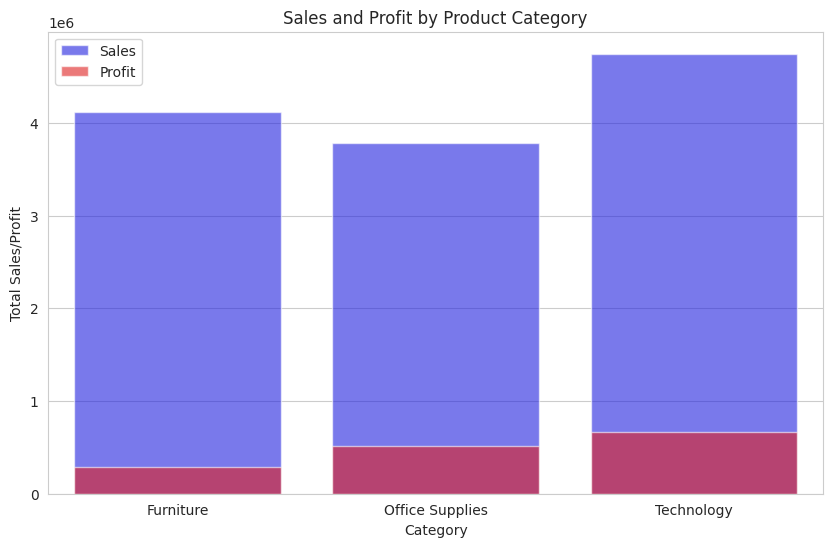

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Grouping data by Category and summing up Sales and Profit
category_group = global_superstore_data.groupby('Category').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

# Creating a bar plot for Sales and Profit by Category
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Sales', data=category_group, label="Sales", color="b", alpha=0.6)
sns.barplot(x='Category', y='Profit', data=category_group, label="Profit", color="r", alpha=0.6)

plt.title('Sales and Profit by Product Category')
plt.ylabel('Total Sales/Profit')
plt.legend()
plt.show()


**The visualization above shows the total sales and profit for each product category. Here’s what we can observe:**

**Technology** has the highest sales and profits among the categories, indicating a strong market performance.

**Office Supplies** show moderate sales but lower profits, suggesting thinner margins or possibly higher costs associated with these products.

**Furniture** has relatively high sales but significantly lower profits compared to Technology, indicating potential issues such as high costs, discounts affecting margins, or pricing strategies that might need optimization.

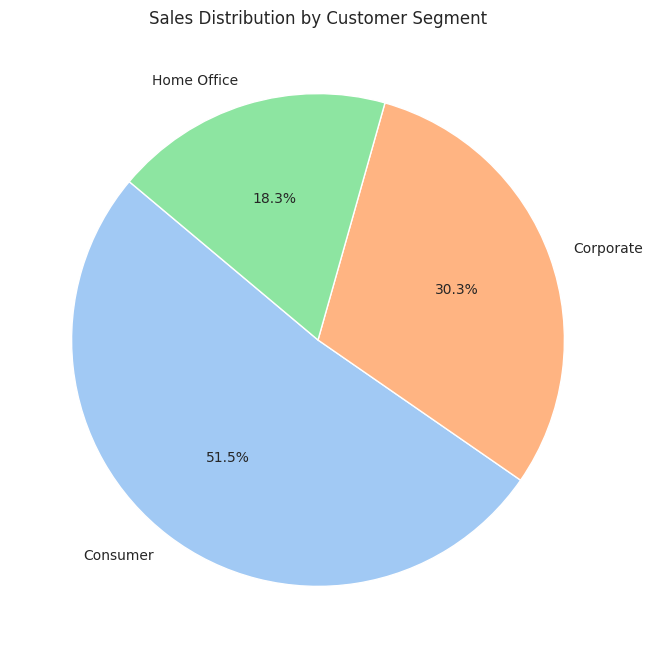

In [4]:
# Grouping data by Segment and summing up Sales
segment_group = global_superstore_data.groupby('Segment').agg({'Sales': 'sum'}).reset_index()

# Creating a pie chart for sales distribution across customer segments
plt.figure(figsize=(8, 8))
plt.pie(segment_group['Sales'], labels=segment_group['Segment'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Sales Distribution by Customer Segment')
plt.show()


**The pie chart illustrates the distribution of sales across different customer segments:**

**Consumer** segment accounts for the largest portion of sales, which suggests that strategies targeting this segment could be highly beneficial.
**Corporate** and **Home Office** segments also represent significant portions, indicating potential areas for targeted marketing and sales initiatives.

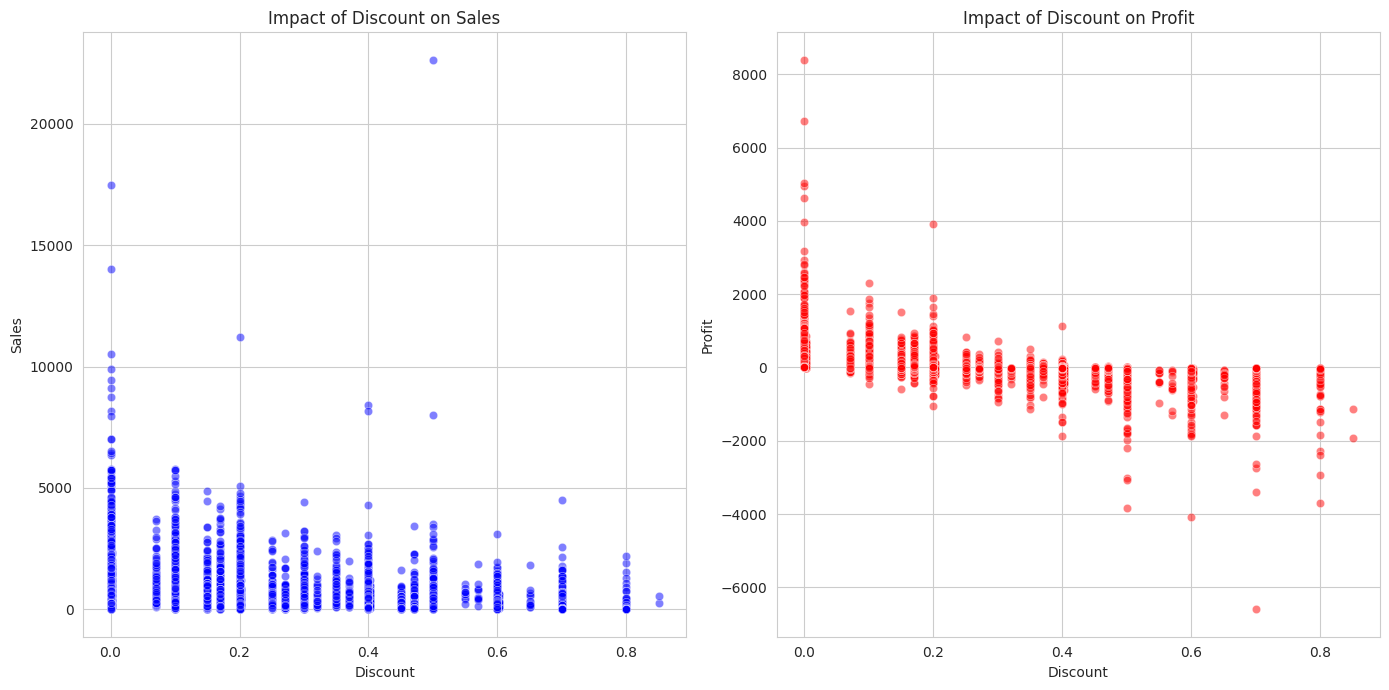

In [5]:
# Creating a scatter plot to analyze the impact of discounts on sales and profit
plt.figure(figsize=(14, 7))

# Scatter plot for Discount vs Sales
plt.subplot(1, 2, 1)
sns.scatterplot(x='Discount', y='Sales', data=global_superstore_data, color='blue', alpha=0.5)
plt.title('Impact of Discount on Sales')
plt.xlabel('Discount')
plt.ylabel('Sales')

# Scatter plot for Discount vs Profit
plt.subplot(1, 2, 2)
sns.scatterplot(x='Discount', y='Profit', data=global_superstore_data, color='red', alpha=0.5)
plt.title('Impact of Discount on Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')

plt.tight_layout()
plt.show()


**The scatter plots reveal interesting trends about the impact of discounts on sales and profits:**

**Impact of Discount on Sales**
> There is a visible trend that as the discount increases, sales also tend to increase, suggesting that higher discounts may drive higher sales volumes. However, the spread indicates that the relationship isn't strictly linear and depends on other factors such as product type, season, or market competition.

**Impact of Discount on Profit**
> The relationship between discount and profit appears to be somewhat inverse; as discounts increase, profits often decrease. This pattern is typical as higher discounts can erode profit margins, especially if not compensated by a proportionate increase in volume.

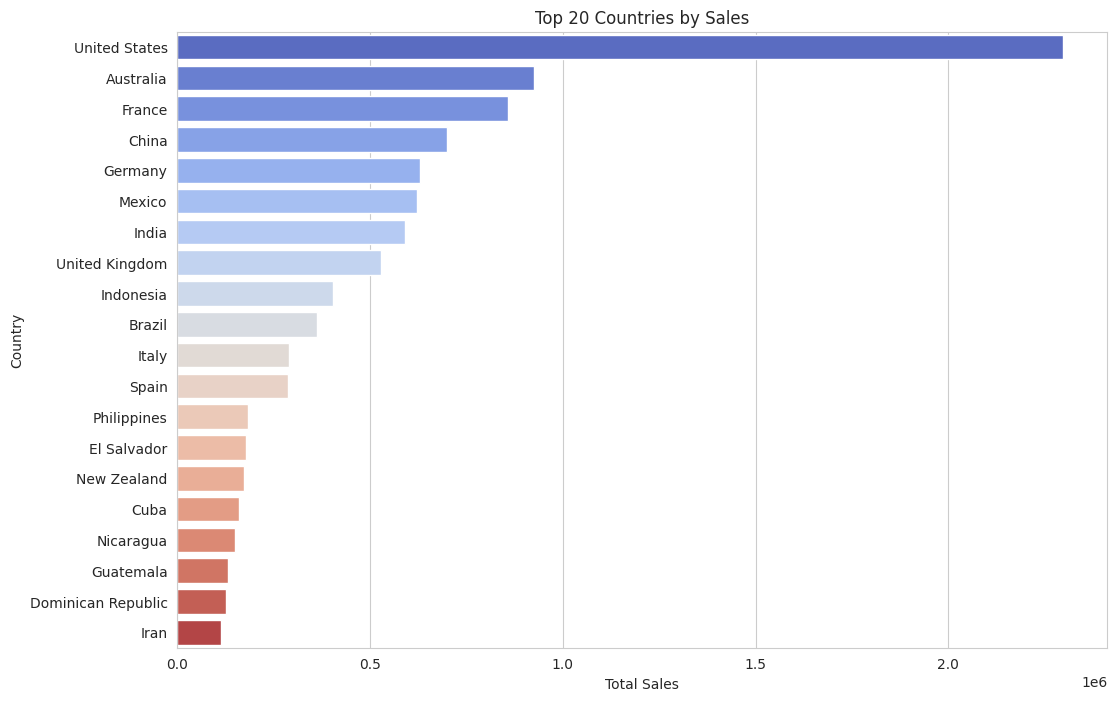

In [6]:
# Grouping data by Country and summing up Sales
country_sales = global_superstore_data.groupby('Country').agg({'Sales': 'sum'}).reset_index()

# Sorting countries by sales for better visualization impact
country_sales_sorted = country_sales.sort_values('Sales', ascending=False)

# Creating a bar plot for Sales by Country
plt.figure(figsize=(12, 8))
sns.barplot(x='Sales', y='Country', data=country_sales_sorted.head(20), palette='coolwarm')
plt.title('Top 20 Countries by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Country')
plt.show()


> The bar plot showcases the top 20 countries by sales. This visualization highlights which markets are currently the most lucrative and could help in identifying regions where further investment in marketing and sales activities might yield substantial returns. 